In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.shape

(2000, 9)

In [5]:
# Categories Pregnancies 
# Continuous Glucose , BloodPressure , SkinThickness , Insulin , DiabetesPedigreeFunction , Age

In [6]:
df.Pregnancies.value_counts()

1     356
0     301
2     284
3     195
4     191
5     141
6     131
7     100
8      96
9      70
10     54
11     24
12     23
13     22
14      7
17      3
15      2
Name: Pregnancies, dtype: int64

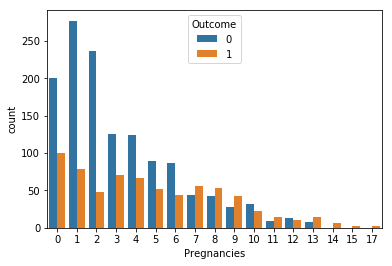

In [7]:
sb.countplot(df.Pregnancies,hue=df.Outcome)

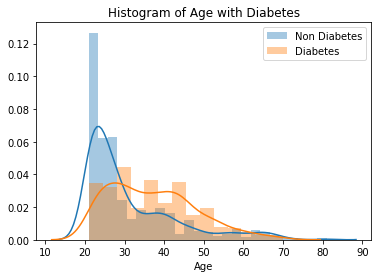

In [8]:
sb.distplot(df[df.Outcome==0].Age,label="Non Diabetes") 
sb.distplot(df[df.Outcome==1].Age, label="Diabetes") 
plt.legend(loc="upper right")
plt.title("Histogram of Age with Diabetes")
plt.show()

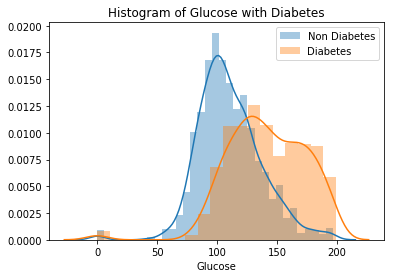

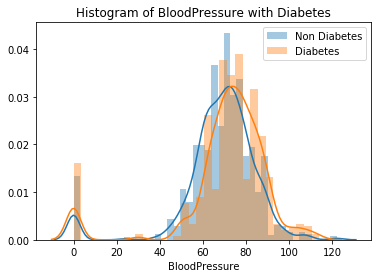

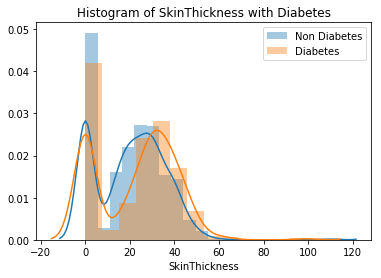

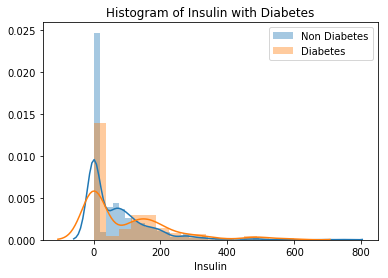

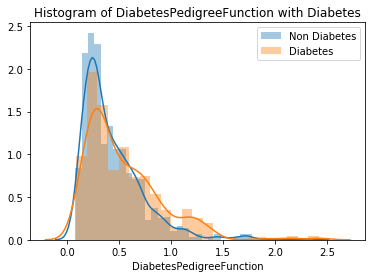

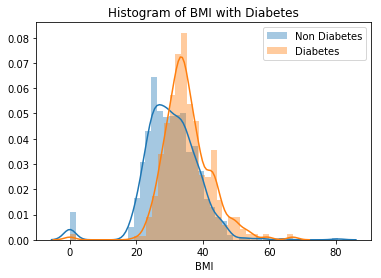

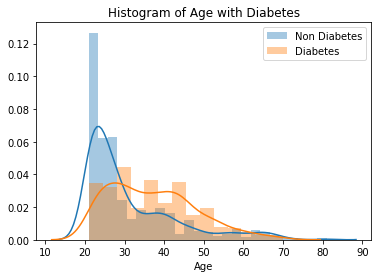

In [9]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","DiabetesPedigreeFunction","BMI","Age"]
#fig, axes = plt.subplots(4,2)
i =0
for col in cols:
    sb.distplot(df[df.Outcome==0][col],label="Non Diabetes") 
    sb.distplot(df[df.Outcome==1][col], label="Diabetes") 
    plt.legend(loc="upper right")
    plt.title("Histogram of "+col+" with Diabetes")
    plt.show()
    i=i+1

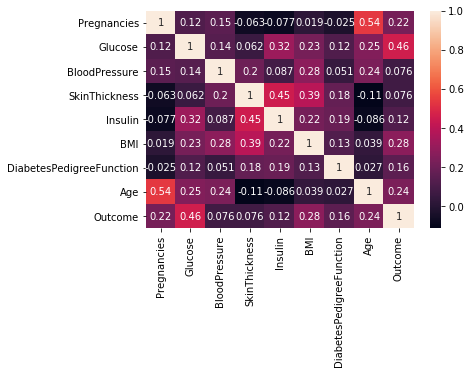

In [10]:
# Correlation

sb.heatmap(df.corr(),annot=True)

In [11]:
df.corr()["Outcome"] # Glucose is with highest coorelation with Outcome

Pregnancies                 0.224437
Glucose                     0.458421
BloodPressure               0.075958
SkinThickness               0.076040
Insulin                     0.120924
BMI                         0.276726
DiabetesPedigreeFunction    0.155459
Age                         0.236509
Outcome                     1.000000
Name: Outcome, dtype: float64

In [12]:
# Missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.shape


(2000, 9)

In [14]:
df["Outcome"].value_counts(normalize=True)

# 65.8% are free from diabetes
# 34.2% 

0    0.658
1    0.342
Name: Outcome, dtype: float64

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [16]:
# Glucose , BloodPressure , SkinThickness , Insulin , BMI has minimum value as zero.
# Usually they cannot be

In [17]:
# replace zero with None for all above columns 

zero_columns = ["Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"]

for col in zero_columns:
    df[col].replace([0],[None],inplace=True)

In [18]:
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
# above cols have missing values 
df.describe()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,0.470930,33.090500,0.342000
std,3.306063,0.323553,11.786423,0.474498
min,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.244000,24.000000,0.000000
50%,3.000000,0.376000,29.000000,0.000000
75%,6.000000,0.624000,40.000000,1.000000
max,17.000000,2.420000,81.000000,1.000000


In [20]:
df_dropped = df.dropna()

In [21]:
df.mean()

Pregnancies                   3.703500
Glucose                     121.975340
BloodPressure                72.403665
SkinThickness                29.341275
Insulin                     153.743295
BMI                          32.650101
DiabetesPedigreeFunction      0.470930
Age                          33.090500
Outcome                       0.342000
dtype: float64

In [22]:
df_dropped.mean()

Pregnancies                   3.185507
Glucose                     122.842512
BloodPressure                70.803865
SkinThickness                29.263768
Insulin                     153.946860
BMI                          33.307633
DiabetesPedigreeFunction      0.522839
Age                          30.670531
Outcome                       0.325604
dtype: float64

Text(0, 0.5, '% change')

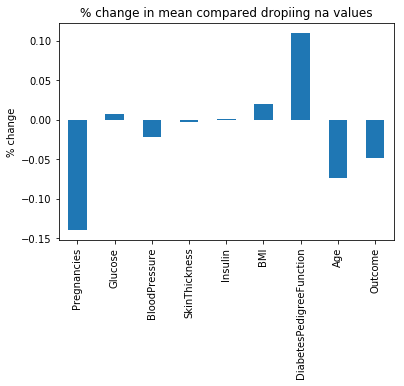

In [23]:
ax = ((df_dropped.mean()-df.mean())/df.mean()).plot(kind="bar",title ="% change in mean compared dropiing na values")
ax.set_ylabel('% change')

In [24]:
# we could see % change before anf after dropping na is huge for columns Pregenancies , DiabetesPedigreeFunction

In [25]:
# lets give a try for machine learning and how dropped data behaves

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
# GridSearchCV module automatically find the best combo of params for the KNN model that best fits our data with respect to cross-validated
# accuracy.

In [28]:
X_dropped = df_dropped.drop('Outcome',axis=1)

In [29]:
Y_dropped = df_dropped['Outcome']

In [30]:
knn_params = {'n_neighbors':[1,2,3,4,5,6,7]}
knn = KNeighborsClassifier() # Instaniate the model

In [31]:
grid = GridSearchCV(knn,knn_params,cv=100)
grid.fit(X_dropped,Y_dropped)

C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=100, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print(grid.best_score_ , grid.best_params_)

0.9990338164251208 {'n_neighbors': 1}


In [33]:
# Pipelines in machine learning

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_Insulin = df[['Insulin']].copy()
y = df.Outcome.copy()
X_Insulin.isnull().sum()

Insulin    956
dtype: int64

In [36]:

# filling missing values before split
X_Insulin = X_Insulin.fillna(X_Insulin.mean())
X_Insulin.mean()
X_train,X_test,y_train,y_test = train_test_split(X_Insulin,y)

In [37]:
knn_Insulin = KNeighborsClassifier()
knn_Insulin.fit(X_train,y_train)
knn_Insulin.score(X_test,y_test)

0.696

In [38]:
# lets impute after splitting 
X_train,X_test,y_train,y_test = train_test_split(df[['Insulin']].copy(),y)

In [39]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [40]:
knn_Insulin_Impute_After = KNeighborsClassifier()
knn_Insulin_Impute_After.fit(X_train,y_train)
knn_Insulin_Impute_After.score(X_test,y_test)

#it is a more honest representation of the model's ability to learn from the training set's features and apply what it learned to unseen and withheld testing data.

0.674

In [41]:
#Scikit-learn's pipelines make this entire process much easier by giving structure and order to the steps of our machine learning pipelines.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

In [43]:
knn_params = {'classify__n_neighbors':[1,2,3,4,5,6,7]}
knn = KNeighborsClassifier()

In [44]:
mean_impute = Pipeline([('imputer',Imputer(strategy='mean')), ('classify',knn)])
median_impute = Pipeline([('imputer',Imputer(strategy='median')), ('classify',knn)])

C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
X = df.drop('Outcome' , axis=1)
y = df['Outcome']

In [46]:
grid_mean = GridSearchCV(mean_impute,knn_params,cv=5)
grid_mean.fit(X,y)

grid_median = GridSearchCV(median_impute,knn_params,cv=5)
grid_median.fit(X,y)

C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuu

C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuu

C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuu

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
print("Mean :  ",grid_mean.best_score_ , grid_mean.best_params_)
print("Median :  ",grid_median.best_score_ , grid_median.best_params_)

Mean :   0.995 {'classify__n_neighbors': 1}
Median :   0.9945 {'classify__n_neighbors': 1}


In [48]:
impute = Imputer(strategy = 'mean')
df_impute_mean = pd.DataFrame(impute.fit_transform(df),columns = df.columns)
#df.isnull().sum()

C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [49]:
df_impute_mean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D1C9DFD68>,
      dtype=object)

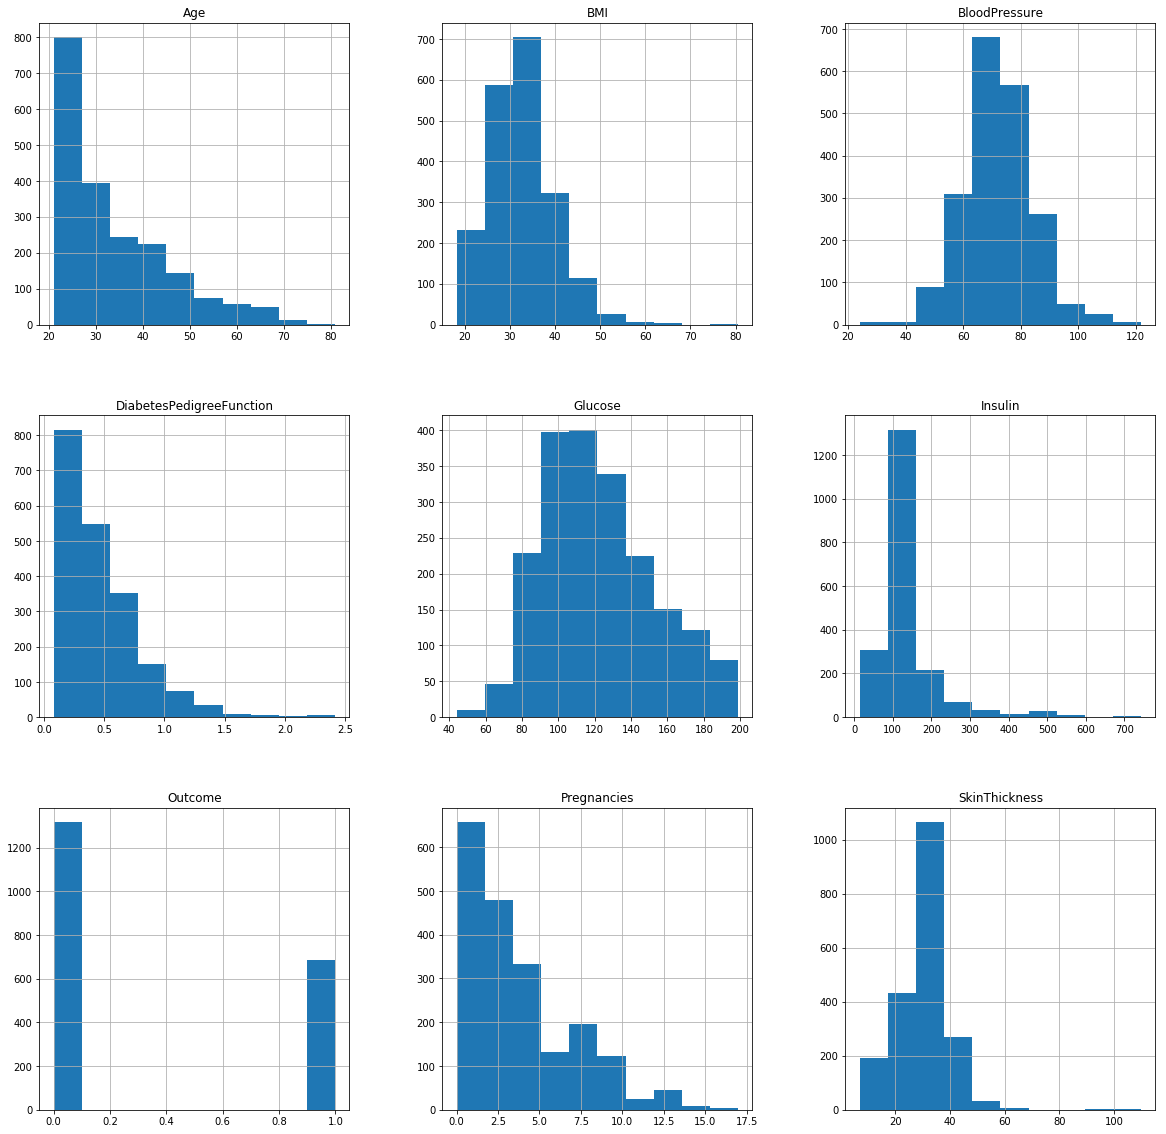

In [50]:
df_impute_mean.hist(figsize=(20,20))

In [51]:
df_impute_mean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.975340,72.403665,29.341275,153.743295,32.650101,0.470930,33.090500,0.342000
std,3.306063,30.533114,11.949531,9.123652,80.376307,7.190136,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,29.341275,153.743295,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,153.743295,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D1D48CB70>,
      dtype=object)

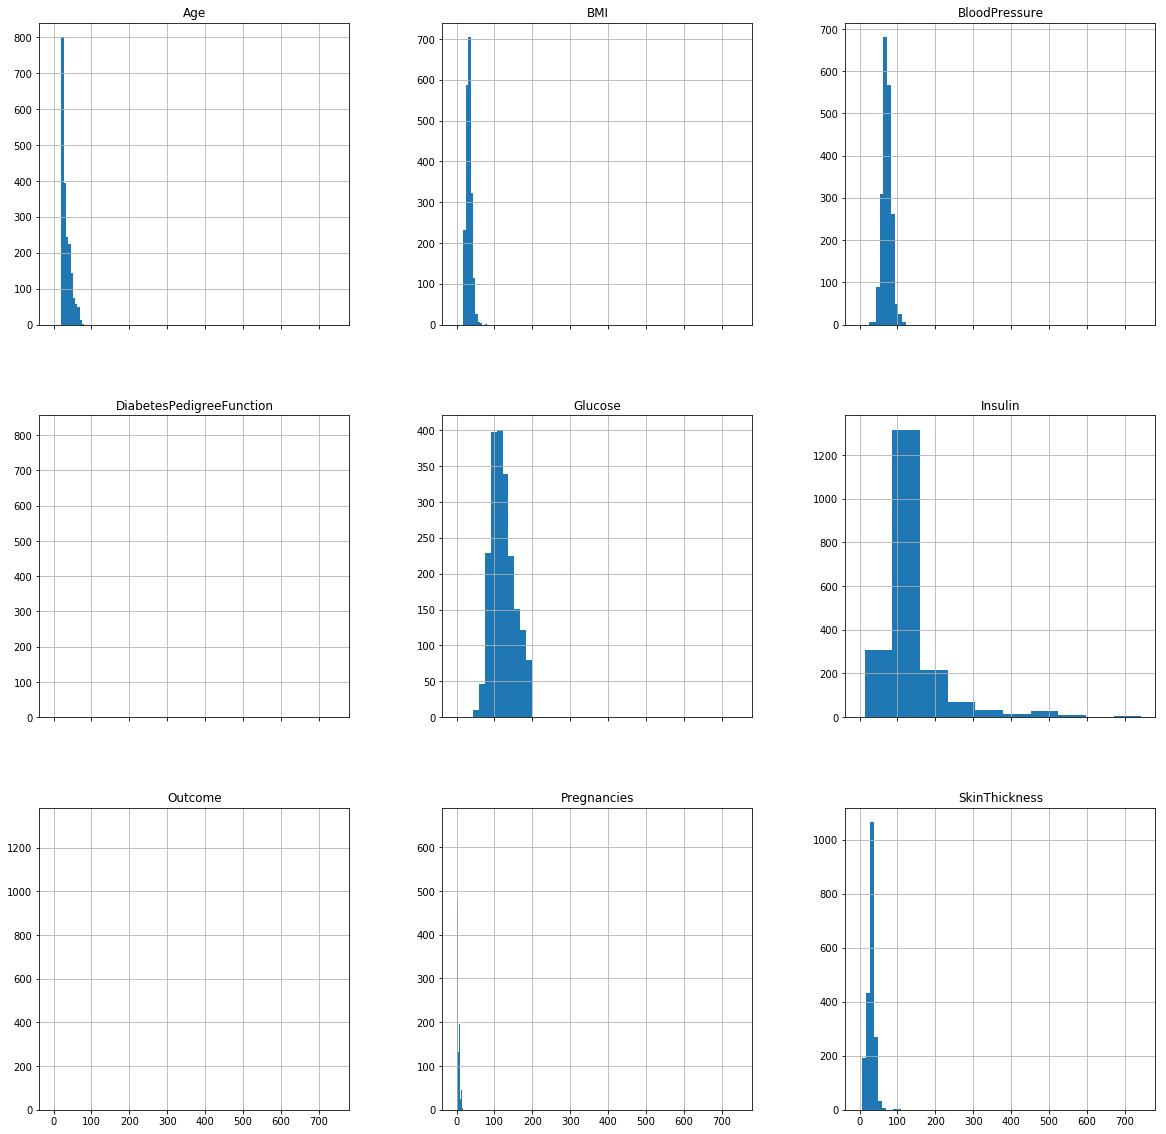

In [52]:
df_impute_mean.hist(figsize=(20,20),sharex=True)

In [53]:
# Data lives on vastly different scales
#Normalization techniques are meant to level the playing field of data by ensuring that all rows and columns are treated equally

In [56]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df_min_Max_transform = pd.DataFrame(min_max_scaler.fit_transform(df_impute_mean),columns = df_impute_mean.columns)

In [57]:
df_min_Max_transform.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.217853,0.503067,0.493915,0.216906,0.191429,0.231572,0.167775,0.201508,0.342000
std,0.194474,0.196988,0.121934,0.088579,0.110105,0.115227,0.138152,0.196440,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.354839,0.408163,0.174757,0.145205,0.150641,0.070880,0.050000,0.000000
50%,0.176471,0.477419,0.489796,0.216906,0.191429,0.227564,0.127242,0.133333,0.000000
75%,0.352941,0.625806,0.571429,0.242718,0.191429,0.298077,0.233134,0.316667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
knn_params = ={'imputer_strategy':['mean','median'],'classify_neighbors':[1,2,3,4,5,6,7]}

In [59]:
mean_impute_standardize = Pipeline([('imputer',Imputer()),('standardize',MinMaxScaler()),('classify',knn)])

C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [60]:
X = df.drop('Outcome',axis=1)


In [61]:
y = df['Outcome']

In [62]:
grid = GridSearchCV(mean_impute_standardize,knn_params)
grid.fit(X,y)

C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
print(grid.best_score_,grid.best_params_)

0.99 {'classify__n_neighbors': 1}


In [65]:
from sklearn.tree import DecisionTreeClassifier


In [68]:
df_min_Max_transform.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.606452,0.387755,0.271845,0.191429,0.246795,0.020922,0.433333,1.0
1,0.000000,0.258065,0.591837,0.233010,0.152055,0.320513,0.066183,0.033333,0.0
2,0.000000,0.651613,0.493915,0.216906,0.191429,0.416667,0.235696,0.166667,1.0
3,0.000000,0.587097,0.448980,0.339806,0.323288,0.386218,0.122545,0.050000,1.0
4,0.058824,0.612903,0.387755,0.330097,0.638356,0.360577,0.195559,0.000000,0.0


In [80]:
y= df_min_Max_transform['Outcome']

X_train,X_test,y_train,y_test = train_test_split(df_min_Max_transform.drop('Outcome',axis=1),y)

In [82]:

clf = DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf = clf.fit(X_train,y_train)


In [83]:
y_pred = clf.predict(X_test)

In [84]:
from sklearn import metrics

In [85]:
print(metrics.accuracy_score(y_test,y_pred))

0.774


In [90]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [94]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=df_min_Max_transform.drop('Outcome',axis=1).columns,class_names=['0','1'])

In [95]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [98]:
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,None,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,None,None,None,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
